In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [4]:
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

0    164
1    139
Name: num, dtype: int64

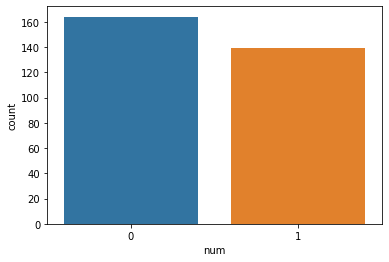

In [8]:
import seaborn as sn
sn.countplot(x='num',data=dataset)
dataset.num.value_counts()

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
from sklearn.externals import joblib

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8043478260869565

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.79      0.75      0.77        20

   micro avg       0.80      0.80      0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.80      0.80      0.80        46



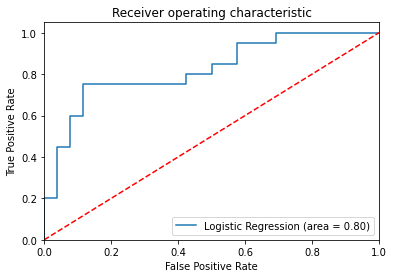

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)


In [17]:
print(ynew)

[1]
